In [ ]:
# todo normalization

In [4]:
# time interval = 5 min
# outlier removing
# for whole date from 2012-1-1 3:00 to 2012-12-15 0:00
# with 30% test data (evaluating)
# rolling 2
# todo when to use the outlier detection? before or after resample? with the test or without the test?

# using the index of energy data
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

from sklearn import preprocessing
from sklearn.ensemble.forest import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn import svm

# file1 = 'D:/PYworks/MaveV20/mave/data/12.csv'
OriFile = 'D:/PYworks/JupyterWorks/12.csv'
# dateparse = lambda x: pd.datetime.strptime(x, '%Y/%m/%d %H:%M')
# Chw05_Rm26 = pd.read_csv(file1, parse_dates = ['Date'], date_parser=dateparse, header=0)

OriTable = pd.read_csv(OriFile, header=0)
OriTable.index = pd.to_datetime(OriTable['LocalDateTime'])
OriTable.LocalDateTime = pd.to_datetime(OriTable.LocalDateTime).dt.strftime('%m/%d/%Y %H:%M')
OriTable_5m_nHol_nOt = OriTable[OriTable.index <= '2012-12-15']
OriTable_5m_nHol_nOt

,LocalDateTime,EnergyConsumption,OutsideDryBulbTemperature
LocalDateTime,,,
2012-01-01 00:05:00,01/01/2012 00:05,27.0053,-8.250000e-01
2012-01-01 00:10:00,01/01/2012 00:10,25.0049,-5.500000e-01
2012-01-01 00:15:00,01/01/2012 00:15,26.0051,-2.750000e-01
2012-01-01 00:20:00,01/01/2012 00:20,25.0049,-1.110000e-16
2012-01-01 00:25:00,01/01/2012 00:25,27.0053,2.750000e-01
2012-01-01 00:30:00,01/01/2012 00:30,25.0049,5.500000e-01
2012-01-01 00:35:00,01/01/2012 00:35,27.0053,8.250000e-01
2012-01-01 00:40:00,01/01/2012 00:40,25.0049,1.100000e+00
2012-01-01 00:45:00,01/01/2012 00:45,26.0051,1.375000e+00


D:\ProgramData\Anaconda252064\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5574614014271182 0.24637046116840677


TypeError: unhashable type: 'numpy.ndarray'

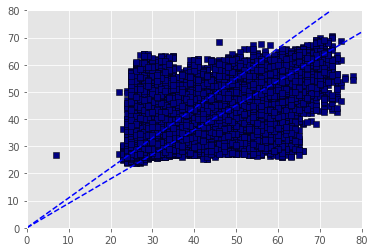

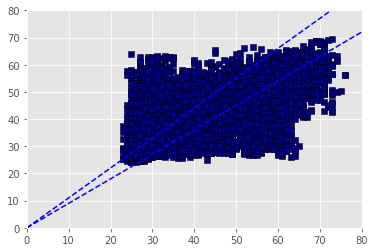

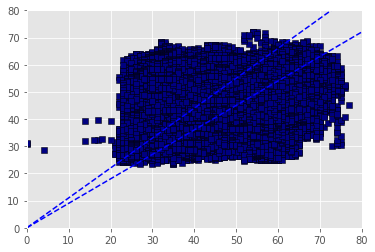

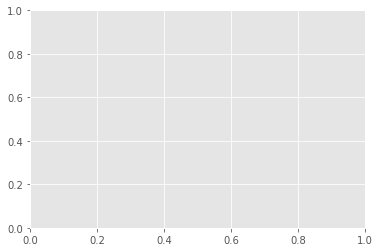

In [5]:
X = OriTable_5m_nHol_nOt['OutsideDryBulbTemperature'].values.reshape(-1, 1)
X = np.append(X,np.roll(X,-48),axis=1 )
X = np.append(X,np.roll(X[:,0].reshape(-1, 1),-96),axis=1 )

y = OriTable_5m_nHol_nOt['EnergyConsumption'].values.reshape(-1, 1)
changepoints = pd.to_datetime('2012-7-1')
index_change = OriTable_5m_nHol_nOt[OriTable_5m_nHol_nOt.index<changepoints].shape[0]
# max_depth = 30

X_train, X_val, y_train, y_val = train_test_split(  X[:index_change], y[:index_change], test_size=0.25, random_state=0)

# X_train = X[:index_change]
# X_train_StandardScaler = preprocessing.StandardScaler().fit(X_train)
# X_train_std = X_train_StandardScaler.transform(X_train)

# y_train = y[:index_change]
# y_train_StandardScaler =  preprocessing.StandardScaler().fit(y_train)
# y_train_std = y_train_StandardScaler.transform(y_train)
# print X_train_std,y_train_std

X_test = X[index_change:]
y_test = y[index_change:]
# X_test_std = X_train_StandardScaler.transform(X_test)
# y_test_std = y_train_StandardScaler.transform(y_test)

# regr_rf = RandomForestRegressor(max_depth=max_depth, random_state=2)

regr_rf = svm.SVR()
regr_rf.fit(X_train, y_train)

y_train_rf = regr_rf.predict(X_train)
y_val_rf = regr_rf.predict(X_val)
y_test_rf = regr_rf.predict(X_test)

print regr_rf.score(X_val, y_val), regr_rf.score(X_test, y_test)


# y_rf = y_train_StandardScaler.inverse_transform(y_rf_std)
plt.figure()
plt.scatter(y_train, y_train_rf, edgecolor='k', c="navy", marker="s", label="Data")
line=np.linspace(0, 80, 100)
plt.plot(line,0.9 * line,'b--')
plt.plot(line,1.1 * line,'b--')
plt.xlim([0, 80])
plt.ylim([0, 80])

plt.figure()
plt.scatter(y_val, y_val_rf, edgecolor='k', c="navy", marker="s", label="Data")
line=np.linspace(0, 80, 100)
plt.plot(line,0.9 * line,'b--')
plt.plot(line,1.1 * line,'b--')
plt.xlim([0, 80])
plt.ylim([0, 80])

plt.figure()
plt.scatter(y_test, y_test_rf, edgecolor='k', c="navy", marker="s", label="Data")
line=np.linspace(0, 80, 100)
plt.plot(line,0.9 * line,'b--')
plt.plot(line,1.1 * line,'b--')
plt.xlim([0, 80])
plt.ylim([0, 80])

# plt.figure()
# plt.plot(OriTable_5m_nHol_nOt[index_change:],y_test_rf)

print r2_score(y_test,y_rf)
print mean_squared_error(y_test,y_rf)
print explained_variance_score(y_test,y_rf)

                                 time        y       y_rf
LocalDateTime                                            
2012-07-01 00:00:00  07/01/2012 00:00  30.0059  37.314370
2012-07-01 00:05:00  07/01/2012 00:05  32.0063  36.515919
2012-07-01 00:10:00  07/01/2012 00:10  30.0059  35.753313
2012-07-01 00:15:00  07/01/2012 00:15  33.0065  35.026700
2012-07-01 00:20:00  07/01/2012 00:20  32.0063  34.336159
2012-07-01 00:25:00  07/01/2012 00:25  31.0061  33.681747
2012-07-01 00:30:00  07/01/2012 00:30  31.0061  33.063531
2012-07-01 00:35:00  07/01/2012 00:35  32.0063  32.481619
2012-07-01 00:40:00  07/01/2012 00:40  31.0061  31.936183
2012-07-01 00:45:00  07/01/2012 00:45  31.0061  31.427472
2012-07-01 00:50:00  07/01/2012 00:50  30.0059  30.955816
2012-07-01 00:55:00  07/01/2012 00:55  29.0057  30.521630
2012-07-01 01:00:00  07/01/2012 01:00  29.0057  30.125397
2012-07-01 01:05:00  07/01/2012 01:05  29.0057  29.794724
2012-07-01 01:10:00  07/01/2012 01:10  29.0057  29.522174
2012-07-01 01:

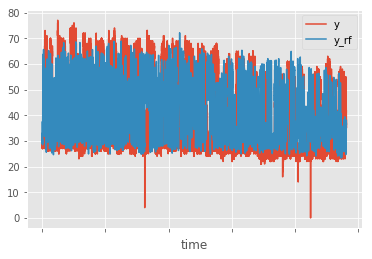

In [14]:
aa = pd.DataFrame({
    'time':OriTable_5m_nHol_nOt[index_change:]['LocalDateTime']
    ,'y_rf':y_test_rf
    ,'y':y_test.ravel()
})
print aa

label = aa .columns.values.tolist()
aa.plot(x = label[0], y = label[1:3])


In [ ]:
# OriTable_5m_nHol_nOt[index_change:]['LocalDateTime']

plt.figure()
plt.plot(OriTable_5m_nHol_nOt[index_change:]['LocalDateTime'],y_test_rf.reshape(-1, 1))
# plt.figure()
# ax = plt.axes()
# ax.plot(OriTable_5m_nHol_nOt[index_change:]['LocalDateTime'],y_rf,OriTable_5m_nHol_nOt[index_change:]['LocalDateTime'],y_test)

In [ ]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

from sklearn import preprocessing
from sklearn.ensemble.forest import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

# file1 = 'D:/PYworks/MaveV20/mave/data/12.csv'
EnFile = 'D:/WORKS/BEAR WORKS/100EnerNOCCommercialBuildings/csv/12.csv'
# dateparse = lambda x: pd.datetime.strptime(x, '%Y/%m/%d %H:%M')
# Chw05_Rm26 = pd.read_csv(file1, parse_dates = ['Date'], date_parser=dateparse, header=0)

EnOriTable = pd.read_csv(EnFile, header=0)
EnOriTable.index = pd.to_datetime(EnOriTable['dttm_utc'])
EnOriTable.dttm_utc = pd.to_datetime(EnOriTable.dttm_utc).dt.strftime('%m/%d/%Y %H:%M')
EnOriTable

In [ ]:
# test the function of numpy 'where' and index. better to use pandas index
EnOriTable.index.get_loc('2012-12-31 23:45:00')
EnOri = EnOriTable.values
a = (np.where(EnOri==u'01/01/2012 00:15'))[0][0]
# a[0]
aa = EnOri[:a]
bb = EnOriTable.iloc[a]
# aa = EnOri[np.where(EnOri==u'01/01/2012 00:15')[0]:]
# print a[1][0]
# print len(a)
print a
print aa
print bb

In [ ]:
WeaFile = 'D:/WORKS\BEAR WORKS/100EnerNOCCommercialBuildings/weather/NY.csv'
WeaOriTable = pd.read_csv(WeaFile, header=0)
WeaOriTable.index = pd.to_datetime(WeaOriTable['DateTime'])
WeaOriTable

In [ ]:
# WeaOriTable.DateTime = pd.to_datetime(EnOriTable.dttm_utc).dt.strftime('%m/%d/%Y %H:%M')
Wea5mTable = WeaOriTable.resample(rule='5T',label='right',closed='right').asfreq().interpolate(method='linear')
Wea5mTable


In [ ]:
# show the original data
# WeaOriTable['Temp'].plot()
EnOriTable['value'].plot()
# EnOriTable['value'].plot.box()

In [ ]:


aa = EnOriTable[EnOriTable['value']>EnOriTable['value'].quantile(0.05)].index
# aa[aa>'2012-12-20']
# EnOriTable[EnOriTable['value']>EnOriTable['value'].quantile(0.05)]['value'].plot()
# WeaOriTable
b = Wea5mTable.loc[aa]
b = b[(b.index >= Wea5mTable.index[0]) & (b.index <= Wea5mTable.index[len(Wea5mTable.index)-1])]
b = b[b.index <= '2012-12-15']
b['Temp'].plot()
EnOriTable.loc[b.index]['value'].plot()
b.index

In [ ]:
# resample by the timestamp of the original weather data
# En_5m_nHol_nOt = (EnOriTable[EnOriTable['value']>EnOriTable['value'].quantile(0.05)])[(EnOriTable.index >= WeaOriTable.index[0]) & (EnOriTable.index <= '2012-12-15')]
# En_5m_nHol_nOt = EnOriTable[(EnOriTable.index >= WeaOriTable.index[0]) & (EnOriTable.index <= '2012-12-15')][EnOriTable['value']>EnOriTable['value'].quantile(0.05)]
En_6h = EnOriTable.loc[WeaOriTable.index]

En_6h_nHol_nOt = En_6h[En_6h.index <= '2012-12-15'][En_6h['value']>En_6h['value'].quantile(0.05)]
En_6h_nHol_nOt
X = WeaOriTable.loc[En_6h_nHol_nOt.index]['Temp'].values.reshape(-1, 1)
X

In [ ]:
# time interval = 5 min
# outlier removing
# for whole date from 2012-1-1 3:00 to 2012-12-15 0:00
# with 30% test data (evaluating)
# rolling 2
# todo when to use the outlier detection? before or after resample? with the test or without the test?

# using the index of energy data
from sklearn import svm

Wea5mTable = WeaOriTable.resample(rule='5T',label='right',closed='right').asfreq().interpolate(method='linear')
Wea_5m_nHol = Wea5mTable[Wea5mTable.index <= '2012-12-15']
En_5m_nHol = EnOriTable.loc[Wea_5m_nHol.index]
En_5m_nHol_nOt = En_5m_nHol[En_5m_nHol['value']>En_5m_nHol['value'].quantile(0.05)]

# todo stand

X = Wea5mTable.loc[En_5m_nHol_nOt.index]['Temp'].values.reshape(-1, 1)
X = np.append(X,np.roll(X,-18),axis=1 )
X = np.append(X,np.roll(X[:,0].reshape(-1, 1),-36),axis=1 )

y = En_5m_nHol_nOt['value'].values.reshape(-1, 1)
changepoints = pd.to_datetime('2012-10-1')
index_change = WeaOriTable[WeaOriTable.index<changepoints].shape[0]
# max_depth = 30

X_train, X_val, y_train, y_val = train_test_split(  X[:index_change], y[:index_change], test_size=0.25, random_state=0)


# X_train = X[:index_change]
# X_train_StandardScaler = preprocessing.StandardScaler().fit(X_train)
# X_train_std = X_train_StandardScaler.transform(X_train)

# y_train = y[:index_change]
# y_train_StandardScaler =  preprocessing.StandardScaler().fit(y_train)
# y_train_std = y_train_StandardScaler.transform(y_train)
# print X_train_std,y_train_std

X_test = X[index_change:]
y_test = y[index_change:]
# X_test_std = X_train_StandardScaler.transform(X_test)
# y_test_std = y_train_StandardScaler.transform(y_test)

# regr_rf = RandomForestRegressor(max_depth=max_depth, random_state=2)

regr_rf = svm.SVR()
regr_rf.fit(X_train, y_train)
y_rf = regr_rf.predict(X_test)
print regr_rf.score(X_val, y_val), regr_rf.score(X_test, y_test)


# y_rf = y_train_StandardScaler.inverse_transform(y_rf_std)

plt.scatter(y_test, y_rf, edgecolor='k', c="navy", marker="s", label="Data")
line=np.linspace(0, 80, 100)
plt.plot(line,0.9 * line,'b--')
plt.plot(line,1.1 * line,'b--')
plt.xlim([0, 80])
plt.ylim([0, 80])

plt.figure()
ax = plt.axes(y_test)
ax.plot()
print r2_score(y_test,y_rf)
print mean_squared_error(y_test,y_rf)
print explained_variance_score(y_test,y_rf)


In [ ]:
# time interval = 5 min
# outlier removing
# for whole date from 2012-1-1 3:00 to 2012-12-15 0:00
# with 30% test data (evaluating)
# todo when to use the outlier detection? before or after resample? with the test or without the test?

# using the index of energy data
from sklearn import svm

Wea5mTable = WeaOriTable.resample(rule='5T',label='right',closed='right').asfreq().interpolate(method='linear')
Wea_5m_nHol = Wea5mTable[Wea5mTable.index <= '2012-12-15']
En_5m_nHol = EnOriTable.loc[Wea_5m_nHol.index]
En_5m_nHol_nOt = En_5m_nHol[En_5m_nHol['value']>En_5m_nHol['value'].quantile(0.05)]

X = Wea5mTable.loc[En_5m_nHol_nOt.index]['Temp'].values.reshape(-1, 1)

y = En_5m_nHol_nOt['value'].values.reshape(-1, 1)
changepoints = pd.to_datetime('2012-10-1')
index_change = WeaOriTable[WeaOriTable.index<changepoints].shape[0]
# max_depth = 30

X_train, X_val, y_train, y_val = train_test_split(  X[:index_change], y[:index_change], test_size=0.25, random_state=0)


# X_train = X[:index_change]
# X_train_StandardScaler = preprocessing.StandardScaler().fit(X_train)
# X_train_std = X_train_StandardScaler.transform(X_train)

# y_train = y[:index_change]
# y_train_StandardScaler =  preprocessing.StandardScaler().fit(y_train)
# y_train_std = y_train_StandardScaler.transform(y_train)
# print X_train_std,y_train_std

X_test = X[index_change:]
y_test = y[index_change:]
# X_test_std = X_train_StandardScaler.transform(X_test)
# y_test_std = y_train_StandardScaler.transform(y_test)

# regr_rf = RandomForestRegressor(max_depth=max_depth, random_state=2)

regr_rf = svm.SVR()
regr_rf.fit(X_train, y_train)
y_rf = regr_rf.predict(X_test)
print regr_rf.score(X_val, y_val), regr_rf.score(X_test, y_test)


# y_rf = y_train_StandardScaler.inverse_transform(y_rf_std)

plt.scatter(y_test, y_rf, edgecolor='k', c="navy", marker="s", label="Data")
line=np.linspace(0, 80, 100)
plt.plot(line,0.9 * line,'b--')
plt.plot(line,1.1 * line,'b--')
plt.xlim([0, 80])
plt.ylim([0, 80])
print r2_score(y_test,y_rf)
print mean_squared_error(y_test,y_rf)
print explained_variance_score(y_test,y_rf)


In [ ]:
# time interval = 6 hours
# outlier removing
# for whole date from 2012-1-1 3:00 to 2012-12-15 0:00
# with 30% test data (evaluating)
# todo when to use the outlier detection? before or after resample? with the test or without the test?

# using the index of energy data
from sklearn import svm
En_6h = EnOriTable.loc[WeaOriTable.index]

En_6h_nHol_nOt = En_6h[En_6h.index <= '2012-12-15'][En_6h['value']>En_6h['value'].quantile(0.05)]
En_6h_nHol_nOt
X = WeaOriTable.loc[En_6h_nHol_nOt.index]['Temp'].values.reshape(-1, 1)

y = En_6h_nHol_nOt['value'].values.reshape(-1, 1)
changepoints = pd.to_datetime('2012-10-1')
index_change = WeaOriTable[WeaOriTable.index<changepoints].shape[0]
max_depth = 30

X_train, X_val, y_train, y_val = train_test_split(  X[:index_change], y[:index_change], test_size=0.4, random_state=0)


# X_train = X[:index_change]
# X_train_StandardScaler = preprocessing.StandardScaler().fit(X_train)
# X_train_std = X_train_StandardScaler.transform(X_train)

# y_train = y[:index_change]
# y_train_StandardScaler =  preprocessing.StandardScaler().fit(y_train)
# y_train_std = y_train_StandardScaler.transform(y_train)
# print X_train_std,y_train_std

X_test = X[index_change:]
y_test = y[index_change:]
# X_test_std = X_train_StandardScaler.transform(X_test)
# y_test_std = y_train_StandardScaler.transform(y_test)

# regr_rf = RandomForestRegressor(max_depth=max_depth, random_state=2)

regr_rf = svm.SVR()
regr_rf.fit(X_train, y_train)
y_rf = regr_rf.predict(X_test)
print regr_rf.score(X_val, y_val), regr_rf.score(X_test, y_test)


# y_rf = y_train_StandardScaler.inverse_transform(y_rf_std)

plt.scatter(y_test, y_rf, edgecolor='k', c="navy", marker="s", label="Data")
line=np.linspace(0, 80, 100)
plt.plot(line,0.9 * line,'b--')
plt.plot(line,1.1 * line,'b--')
plt.xlim([0, 80])
plt.ylim([0, 80])
print r2_score(y_test,y_rf)
print mean_squared_error(y_test,y_rf)
print explained_variance_score(y_test,y_rf)


In [ ]:
# time interval = 6 hours
# outlier removing
# for whole date from 2012-1-1 3:00 to 2012-12-15 0:00

# todo when to use the outlier detection? before or after resample? with the test or without the test?

# using the index of energy data
En_6h = EnOriTable.loc[WeaOriTable.index]

En_6h_nHol_nOt = En_6h[En_6h.index <= '2012-12-15'][En_6h['value']>En_6h['value'].quantile(0.05)]
En_6h_nHol_nOt
X = WeaOriTable.loc[En_6h_nHol_nOt.index]['Temp'].values.reshape(-1, 1)

y = En_6h_nHol_nOt['value'].values.reshape(-1, 1)
changepoints = pd.to_datetime('2012-7-1')
index_change = WeaOriTable[WeaOriTable.index<changepoints].shape[0]
max_depth = 30

X_train = X[:index_change]
# X_train_StandardScaler = preprocessing.StandardScaler().fit(X_train)
# X_train_std = X_train_StandardScaler.transform(X_train)

y_train = y[:index_change]
# y_train_StandardScaler =  preprocessing.StandardScaler().fit(y_train)
# y_train_std = y_train_StandardScaler.transform(y_train)
# print X_train_std,y_train_std

X_test = X[index_change:]
y_test = y[index_change:]
# X_test_std = X_train_StandardScaler.transform(X_test)
# y_test_std = y_train_StandardScaler.transform(y_test)

regr_rf = RandomForestRegressor(max_depth=max_depth, random_state=2)
regr_rf.fit(X_train, y_train)
y_rf = regr_rf.predict(X_test)
# y_rf = y_train_StandardScaler.inverse_transform(y_rf_std)

plt.scatter(y_test, y_rf, edgecolor='k', c="navy", marker="s", label="Data")
line=np.linspace(0, 80, 100)
plt.plot(line,0.9 * line,'b--')
plt.plot(line,1.1 * line,'b--')
plt.xlim([0, 80])
plt.ylim([0, 80])
print r2_score(y_test,y_rf)
print mean_squared_error(y_test,y_rf)
print explained_variance_score(y_test,y_rf)


In [ ]:
WeaRol1 = WeaOriTable.rolling(1,)

In [ ]:
# todo get the cross validation

In [ ]:
# time interval = 6 hours
# outlier removing
# for whole date from 2012-1-1 3:00 to 2012-12-15 0:00
# with rolling 2

# todo when to use the outlier detection? before or after resample? with the test or without the test?

# using the index of energy data
En_6h = EnOriTable.loc[WeaOriTable.index]

En_6h_nHol_nOt = En_6h[En_6h.index <= '2012-12-15'][En_6h['value']>En_6h['value'].quantile(0.05)]
En_6h_nHol_nOt
X = WeaOriTable.loc[En_6h_nHol_nOt.index]['Temp'].values.reshape(-1, 1)

y = En_6h_nHol_nOt['value'].values.reshape(-1, 1)
changepoints = pd.to_datetime('2012-7-1')
index_change = WeaOriTable[WeaOriTable.index<changepoints].shape[0]
max_depth = 30

X_train = X[:index_change]
# X_train_StandardScaler = preprocessing.StandardScaler().fit(X_train)
# X_train_std = X_train_StandardScaler.transform(X_train)

y_train = y[:index_change]
# y_train_StandardScaler =  preprocessing.StandardScaler().fit(y_train)
# y_train_std = y_train_StandardScaler.transform(y_train)
# print X_train_std,y_train_std

X_test = X[index_change:]
y_test = y[index_change:]
# X_test_std = X_train_StandardScaler.transform(X_test)
# y_test_std = y_train_StandardScaler.transform(y_test)

regr_rf = RandomForestRegressor(max_depth=max_depth, random_state=2)
regr_rf.fit(X_train, y_train)
y_rf = regr_rf.predict(X_test)
# y_rf = y_train_StandardScaler.inverse_transform(y_rf_std)

plt.scatter(y_test, y_rf, edgecolor='k', c="navy", marker="s", label="Data")
line=np.linspace(0, 80, 100)
plt.plot(line,0.9 * line,'b--')
plt.plot(line,1.1 * line,'b--')
plt.xlim([0, 80])
plt.ylim([0, 80])
print r2_score(y_test,y_rf)
print mean_squared_error(y_test,y_rf)
print explained_variance_score(y_test,y_rf)


In [ ]:
# time interval = 6 hours
# no outlier removing
# for whole date from 2012-1-1 3:00 to 2012-12-31 21:00

X = WeaOriTable['Temp'].values.reshape(-1, 1)
y = EnOriTable.loc[WeaOriTable.index]['value'].values.reshape(-1, 1)
changepoints = pd.to_datetime('2012-7-1')
index_change = WeaOriTable[WeaOriTable.index<changepoints].shape[0]
max_depth = 30

X_train = X[:index_change]
# X_train_StandardScaler = preprocessing.StandardScaler().fit(X_train)
# X_train_std = X_train_StandardScaler.transform(X_train)

y_train = y[:index_change]
# y_train_StandardScaler =  preprocessing.StandardScaler().fit(y_train)
# y_train_std = y_train_StandardScaler.transform(y_train)
# print X_train_std,y_train_std

X_test = X[index_change:]
y_test = y[index_change:]
# X_test_std = X_train_StandardScaler.transform(X_test)
# y_test_std = y_train_StandardScaler.transform(y_test)

regr_rf = RandomForestRegressor(max_depth=max_depth, random_state=2)
regr_rf.fit(X_train, y_train)
y_rf = regr_rf.predict(X_test)
# y_rf = y_train_StandardScaler.inverse_transform(y_rf_std)

plt.scatter(y_test, y_rf, edgecolor='k', c="navy", marker="s", label="Data")
line=np.linspace(0, 80, 100)
plt.plot(line,0.9 * line,'b--')
plt.plot(line,1.1 * line,'b--')
plt.xlim([0, 80])
plt.ylim([0, 80])
print r2_score(y_test,y_rf)
print mean_squared_error(y_test,y_rf)
print explained_variance_score(y_test,y_rf)


In [ ]:
X = WeaOriTable['Temp'].values.reshape(-1, 1)
y = EnOriTable.loc[WeaOriTable.index]['value'].values.reshape(-1, 1)
changepoints = pd.to_datetime('2012-12-1')
index_change = WeaOriTable[WeaOriTable.index<changepoints].shape[0]
max_depth = 30

X_train = X[:index_change]
X_train_StandardScaler = preprocessing.StandardScaler().fit(X_train)
X_train_std = X_train_StandardScaler.transform(X_train)

y_train = y[:index_change]
y_train_StandardScaler =  preprocessing.StandardScaler().fit(y_train)
y_train_std = y_train_StandardScaler.transform(y_train)
# print X_train_std,y_train_std

X_test = X[index_change:]
y_test = y[index_change:]
X_test_std = X_train_StandardScaler.transform(X_test)
# y_test_std = y_train_StandardScaler.transform(y_test)

regr_rf = RandomForestRegressor(max_depth=max_depth, random_state=2)
regr_rf.fit(X_train_std, y_train_std)
y_rf_std = regr_rf.predict(X_test_std)
y_rf = y_train_StandardScaler.inverse_transform(y_rf_std)

plt.scatter(y_test, y_rf, edgecolor='k', c="navy", marker="s", label="Data")
line=np.linspace(0, 80, 100)
plt.plot(line,0.9 * line,'b--')
plt.plot(line,1.1 * line,'b--')
plt.xlim([0, 80])
plt.ylim([0, 80])
print r2_score(y_test,y_rf)
print mean_squared_error(y_test,y_rf)
print explained_variance_score(y_test,y_rf)


In [ ]:


print 'the count of row and cloumn for the training data are :', X_train.shape,y_train.shape
print 'the count of row and cloumn for the test data are :', X_test.shape,y_test.shape
regr_rf = RandomForestRegressor(max_depth=max_depth, random_state=2)
regr_rf.fit(X_train, y_train)
 
y_rf = regr_rf.predict(X_test)
print y_rf
plt.scatter(y_test, y_rf, edgecolor='k', c="navy", marker="s", label="Data")
line=np.linspace(0, 80, 100)
plt.plot(line,0.9 * line,'b--')
plt.plot(line,1.1 * line,'b--')
plt.xlim([0, 80])
plt.ylim([0, 80])
print r2_score(y_test,y_rf)
print mean_squared_error(y_test,y_rf)
print explained_variance_score(y_test,y_rf)

In [ ]:
# use the timestep of the weather data
# add feature to weather data
X = WeaOriTable['Temp'].values.reshape(-1, 1)
X = np.append(X,np.roll(X,-1),axis=1 )
X = np.append(X,np.roll(X[:,0].reshape(-1, 1),-2),axis=1 )
# print X

y = EnOriTable.loc[WeaOriTable.index]['value'].values.reshape(-1, 1)
# print y

changepoints = pd.to_datetime('2012-4-1')
index_change = WeaOriTable[WeaOriTable.index<changepoints].shape[0]
max_depth = 30

X_train = X[:index_change]
y_train = y[:index_change].reshape(-1, 1)

X_test = X[index_change:]
y_test = y[index_change:].reshape(-1, 1)

print 'the count of row and cloumn for the training data are :', X_train.shape,y_train.shape
print 'the count of row and cloumn for the test data are :', X_test.shape,y_test.shape
regr_rf = RandomForestRegressor(max_depth=max_depth, random_state=2)
regr_rf.fit(X_train, y_train)
 
y_rf = regr_rf.predict(X_test)
print y_rf
plt.scatter(y_test, y_rf, edgecolor='k', c="navy", marker="s", label="Data")
line=np.linspace(0, 80, 100)
plt.plot(line,0.9 * line,'b--')
plt.plot(line,1.1 * line,'b--')
plt.xlim([0, 80])
plt.ylim([0, 80])
print r2_score(y_test,y_rf)
print mean_squared_error(y_test,y_rf)
print explained_variance_score(y_test,y_rf)

In [ ]:
# use the timestep of the weather data
# add feature to weather data
X = Wea5mTable['Temp'].values.reshape(-1, 1)
X = np.append(X,np.roll(X,-1),axis=1 )
X = np.append(X,np.roll(X[:,0].reshape(-1, 1),-2),axis=1 )
print X

y = EnOriTable.loc[Wea5mTable.index]['value'].values.reshape(-1, 1)
print y

changepoints = pd.to_datetime('2012-10-1')
index_change = Wea5mTable[Wea5mTable.index<changepoints].shape[0]
max_depth = 30

X_train = X[:index_change]
y_train = y[:index_change].reshape(-1, 1)

X_test = X[index_change:]
y_test = y[index_change:].reshape(-1, 1)

print 'the count of row and cloumn for the training data are :', X_train.shape,y_train.shape
print 'the count of row and cloumn for the test data are :', X_test.shape,y_test.shape
regr_rf = RandomForestRegressor(max_depth=max_depth, random_state=2)
regr_rf.fit(X_train, y_train)
 
y_rf = regr_rf.predict(X_test)
print y_rf
plt.scatter(y_test, y_rf, edgecolor='k', c="navy", marker="s", label="Data")
line=np.linspace(0, 80, 100)
plt.plot(line,0.9 * line,'b--')
plt.plot(line,1.1 * line,'b--')
plt.xlim([0, 80])
plt.ylim([0, 80])
# print r2_score(y_test,y_rf)
# print mean_squared_error(y_test,y_rf)
# print explained_variance_score(y_test,y_rf)

In [ ]:
# DataFrame({'Column1':data[:,0],'Column2':data[:,1]})


# Data5m = pd.DataFrame( {
#     'LocalDateTime': EnOriTable.loc[Wea5mTable.index]['dttm_utc']
#     ,'EnergyConsumption':EnOriTable.loc[Wea5mTable.index]['value']
#     ,'OutsideDryBulbTemperature':Wea5mTable['Temp']
# })
Data5m = pd.concat([EnOriTable.loc[Wea5mTable.index]['dttm_utc']
                    ,EnOriTable.loc[Wea5mTable.index]['value']
                    ,Wea5mTable['Temp']]
                   ,axis=1, keys=['LocalDateTime', 'EnergyConsumption','OutsideDryBulbTemperature'])


Data5m.to_csv('D:/PYworks/MaveV20/mave/data/Data12_In5m.csv',index=False)

# Data5m.to_cvs('D:/PYworks/MaveV20/mave/data/Data12_In5m.csv',index=False, sep=',')

# DataFrame().reset_index(drop=True)

# concat([X['c'], df2['c']], axis=1, keys=['df1', 'df2'])

In [ ]:
changepoints = pd.to_datetime('2012-10-1')
index_change = Wea5mTable[Wea5mTable.index<changepoints].shape[0]
max_depth = 30

X_train = X[:index_change]
y_train = y[:index_change].reshape(-1, 1)

X_test = X[index_change:]
y_test = y[index_change:].reshape(-1, 1)

print 'the count of row and cloumn for the training data are :', X_train.shape,y_train.shape
print 'the count of row and cloumn for the test data are :', X_test.shape,y_test.shape
regr_rf = RandomForestRegressor(max_depth=max_depth, random_state=2)
regr_rf.fit(X_train, y_train)
 
y_rf = regr_rf.predict(X_test)
print y_rf
plt.scatter(y_test, y_rf, edgecolor='k', c="navy", marker="s", label="Data")
line=np.linspace(0, 80, 100)
plt.plot(line,0.9 * line,'b--')
plt.plot(line,1.1 * line,'b--')
plt.xlim([0, 80])
plt.ylim([0, 80])
# print r2_score(y_test,y_rf)
# print mean_squared_error(y_test,y_rf)
# print explained_variance_score(y_test,y_rf)

In [ ]:
WeaOriTable.asfreq(freq='30t')

In [ ]:
# aa = WeaOriTable.resample(rule='5T').asfreq().interpolate(method='linear')
aa = EnOriTable.resample(rule='3H',label='right',closed='right').asfreq()
aa.asfreq(freq='6H')
# aa = aa.drop(pd.Timestamp('2012-01-01 00:00:00'))
# bb = aa.resample(rule='6H',label='right',closed='left').asfreq()
# bb

In [ ]:
cc = EnOriTable.drop(['timestamp','estimated','anomaly'],axis=1)
cc['temp']=aa.Temp
cc.to_csv('D:/PYworks/MaveV20/mave/data/123.csv')
cc

In [ ]:
samples = 366*24*12
# samples
ClgSeason = pd.date_range('2012-01-01 0:05:00',periods = samples, freq = '5T')
ClgSeason=pd.to_datetime( ClgSeason,format = '%Y-%m-%d %H:%M' )
ClgSeason

In [ ]:
# add feature to weather data
X = WeaOriTable.loc[ClgSeason]['Temp'].values.reshape(-1, 1)
X = np.append(X,np.roll(X,-1),axis=1 )
X = np.append(X,np.roll(X[:,0].reshape(-1, 1),-2),axis=1 )
X

In [ ]:
y = EnOriTable.loc[ClgSeason]['value'].values
y

In [ ]:
dd.to_csv('D:/PYworks/MaveV20/mave/data/122.csv')
dd

In [ ]:
aa = EnOriTable.drop(EnOriTable.index[EnOriTable.index < '2012-01-01 03:00:00'])

bb = aa.resample('6H')
bb

In [ ]:
bb = aa.resample('6H')
bb

In [ ]:
new = EnOriTable.resample('3H')
new

In [ ]:
changepoints = pd.to_datetime('2012-6-30')
B = changepoints- ClgSeason[0]
print 'the number of training days is: ', B.days
index_change = B.days*4

max_depth = 30

X_train = X[:index_change]
y_train = y[:index_change].reshape(-1, 1)
X_test = X[(index_change+1):]
y_test = y[(index_change+1):].reshape(-1, 1)

print 'the count of row and cloumn are :', X_train.shape
regr_rf = RandomForestRegressor(max_depth=max_depth, random_state=2)
regr_rf.fit(X_train, y_train)
 
y_rf = regr_rf.predict(X_test)
print y_rf
plt.scatter(y_test, y_rf, edgecolor='k',
            c="navy", marker="s", label="Data")
line=np.linspace(0, 80, 100)
plt.plot(line,0.9 * line,'b--')
plt.plot(line,1.1 * line,'b--')
plt.xlim([0, 80])
plt.ylim([0, 80])

In [ ]:
WeaExtTable = WeaOriTable.resample(rule='30T').asfreq().interpolate(method='linear')
WeaExtTable

In [ ]:
R
# add feature to weather data
X = WeaOriTable.loc[ClgSeason]['Temp'].values.reshape(-1, 1)
X = np.append(X,np.roll(X,-1),axis=1 )
X = np.append(X,np.roll(X[:,0].reshape(-1, 1),-2),axis=1 )
X